# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
weight=([62,63,64,65,66,66.25,67.5,68,68.5,69,70,71,72,73,74])

In [3]:
print(weight)

[62, 63, 64, 65, 66, 66.25, 67.5, 68, 68.5, 69, 70, 71, 72, 73, 74]


In [4]:
height=([114,118,120,125,130,135,137,139,155,160,162,165,170,185,190])

In [5]:
print(height)

[114, 118, 120, 125, 130, 135, 137, 139, 155, 160, 162, 165, 170, 185, 190]


In [6]:
list1=height
list2=weight

In [7]:
plt.plot(height,weight,'ro')

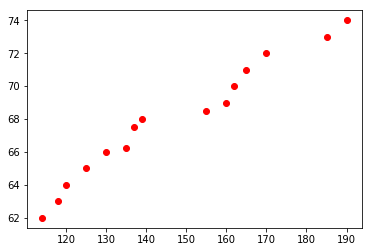

In [8]:
plt.show()

In [9]:
dataset=np.column_stack((height,weight))

In [10]:

# Calculate the mean value of a list of numbers
def mean(values):
	return sum(values) / float(len(values))


In [11]:

# Calculate the variance of a list of numbers
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])


In [12]:

# calculate mean and variance
mean_height, mean_weight = mean(height), mean(weight)
var_height, var_weight = variance(height, mean_height), variance(weight, mean_weight)
print('height stats: mean=%.3f variance=%.3f' % (mean_height, var_height))
print('weight stats: mean=%.3f variance=%.3f' % (mean_weight, var_weight))


height stats: mean=147.000 variance=8344.000
weight stats: mean=67.950 variance=184.525


In [13]:

# Calculate covariance between height and weight
def covariance(height, mean_height, weight, mean_weight):
	covar = 0.0
	for i in range(len(height)):
		covar += (height[i] - mean_height) * (weight[i] - mean_weight)
	return covar


In [14]:

mean_height, mean_weight = mean(height), mean(weight)
covar = covariance(height, mean_height, weight, mean_weight)
print('Covariance: %.3f' % (covar))


Covariance: 1218.000


In [15]:

# Calculate coefficients
def coefficients(dataset):
	height_mean, weight_mean = mean(height), mean(weight)
	b1 = covariance(height, height_mean, weight, weight_mean) / variance(height, height_mean)
	b0 = weight_mean - b1 * height_mean
	return [b0, b1]


In [16]:

b0, b1 = coefficients(dataset)
print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))


Coefficients: B0=46.492, B1=0.146


In [17]:
predictions=list()

In [18]:

# Simple linear regression algorithm
def simple_linear_regression(train, test):
	b0, b1 = coefficients(train)
	for row in test:
		yhat = b0 + b1 * row[0]
		predictions.append(yhat)
	return predictions


In [19]:

# Calculate root mean squared error
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)


In [20]:

# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
	test_set = list()
	for row in dataset:
		row_copy = list(row)
		row_copy[-1] = None
		test_set.append(row_copy)
	predicted = algorithm(dataset, test_set)
	print(predicted)
	actual = [row[-1] for row in dataset]
	rmse = rmse_metric(actual, predicted)
	return rmse


In [21]:

rmse = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))


[63.132885906040272, 63.716778523489936, 64.008724832214767, 64.738590604026854, 65.468456375838926, 66.198322147651012, 66.490268456375844, 66.782214765100676, 69.11778523489933, 69.847651006711416, 70.139597315436248, 70.577516778523488, 71.307382550335575, 73.49697986577182, 74.226845637583892]
RMSE: 0.670


In [22]:
predictions

[63.132885906040272,
 63.716778523489936,
 64.008724832214767,
 64.738590604026854,
 65.468456375838926,
 66.198322147651012,
 66.490268456375844,
 66.782214765100676,
 69.11778523489933,
 69.847651006711416,
 70.139597315436248,
 70.577516778523488,
 71.307382550335575,
 73.49697986577182,
 74.226845637583892]

In [23]:
len(predictions)

15

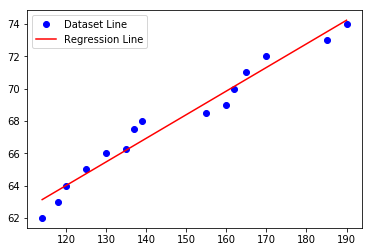

In [24]:

#Plotting Dataset as well as Regression Line 
import matplotlib.pyplot as plt

plt.plot(list1,list2, 'bo', label='Dataset Line')
plt.plot(list1,predictions, 'r-', label='Regression Line')
plt.legend(loc='best')
plt.show()
